In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mental-health/7- number-of-countries-with-primary-data-on-prevalence-of-mental-illnesses-in-the-global-burden-of-disease-study.csv
/kaggle/input/mental-health/6- depressive-symptoms-across-us-population.csv
/kaggle/input/mental-health/3- adult-population-covered-in-primary-data-on-the-prevalence-of-major-depression.csv
/kaggle/input/mental-health/5- anxiety-disorders-treatment-gap.csv
/kaggle/input/mental-health/1- mental-illnesses-prevalence.csv
/kaggle/input/mental-health/4- adult-population-covered-in-primary-data-on-the-prevalence-of-mental-illnesses.csv
/kaggle/input/mental-health/2- burden-disease-from-each-mental-illness(1).csv


## Reading data

In [2]:
df = pd.read_csv("/kaggle/input/mental-health/1- mental-illnesses-prevalence.csv")

In [3]:
df.head()

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 8 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Entity                                                                             6420 non-null   object 
 1   Code                                                                               6150 non-null   object 
 2   Year                                                                               6420 non-null   int64  
 3   Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  6420 non-null   float64
 4   Depressive disorders (share of population) - Sex: Both - Age: Age-standardized     6420 non-null   float64
 5   Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized        6420 non-null   float6

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Visualization

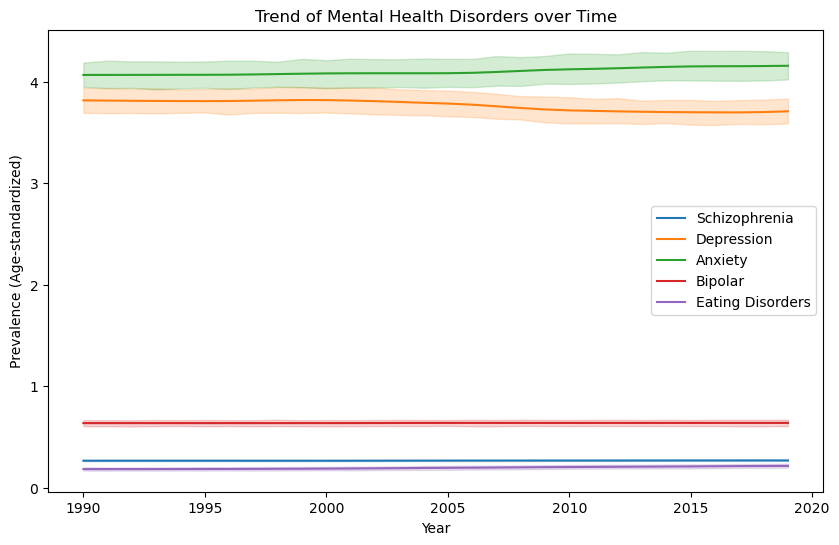

In [6]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized', label='Schizophrenia')
sns.lineplot(data=df, x='Year', y='Depressive disorders (share of population) - Sex: Both - Age: Age-standardized', label='Depression')
sns.lineplot(data=df, x='Year', y='Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized', label='Anxiety')
sns.lineplot(data=df, x='Year', y='Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized', label='Bipolar')
sns.lineplot(data=df, x='Year', y='Eating disorders (share of population) - Sex: Both - Age: Age-standardized', label='Eating Disorders')
plt.title('Trend of Mental Health Disorders over Time')
plt.xlabel('Year')
plt.ylabel('Prevalence (Age-standardized)')
plt.legend()
plt.show()

/tmp/ipykernel_20/2429275825.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


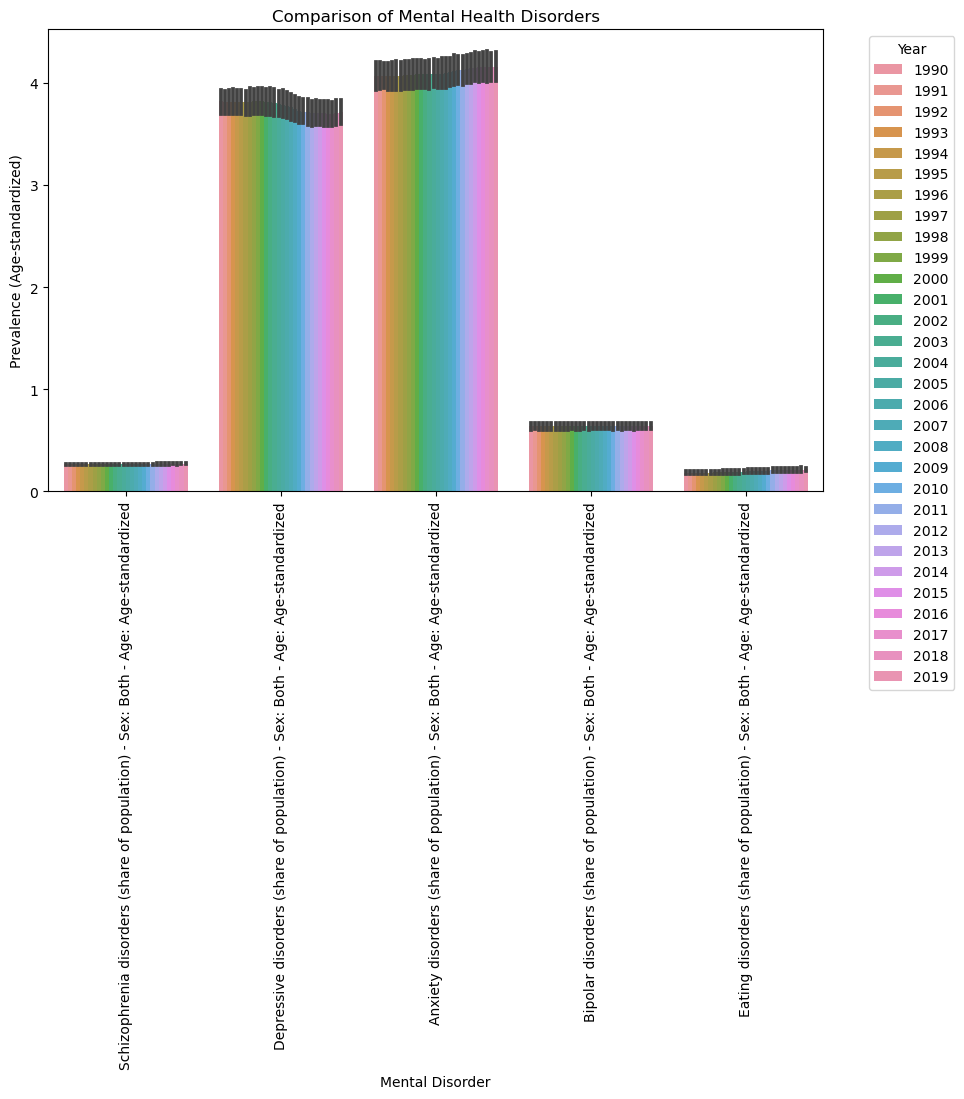

In [7]:
plt.figure(figsize=(10, 6))
df_melted = pd.melt(df, id_vars=['Year'], value_vars=['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
                                                     'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
                                                     'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
                                                     'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
                                                     'Eating disorders (share of population) - Sex: Both - Age: Age-standardized'],
                    var_name='Mental Disorder', value_name='Prevalence')
sns.barplot(data=df_melted, x='Mental Disorder', y='Prevalence', hue='Year')
plt.title('Comparison of Mental Health Disorders')
plt.xlabel('Mental Disorder')
plt.ylabel('Prevalence (Age-standardized)')
plt.xticks(rotation=90)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipykernel_20/1683397164.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


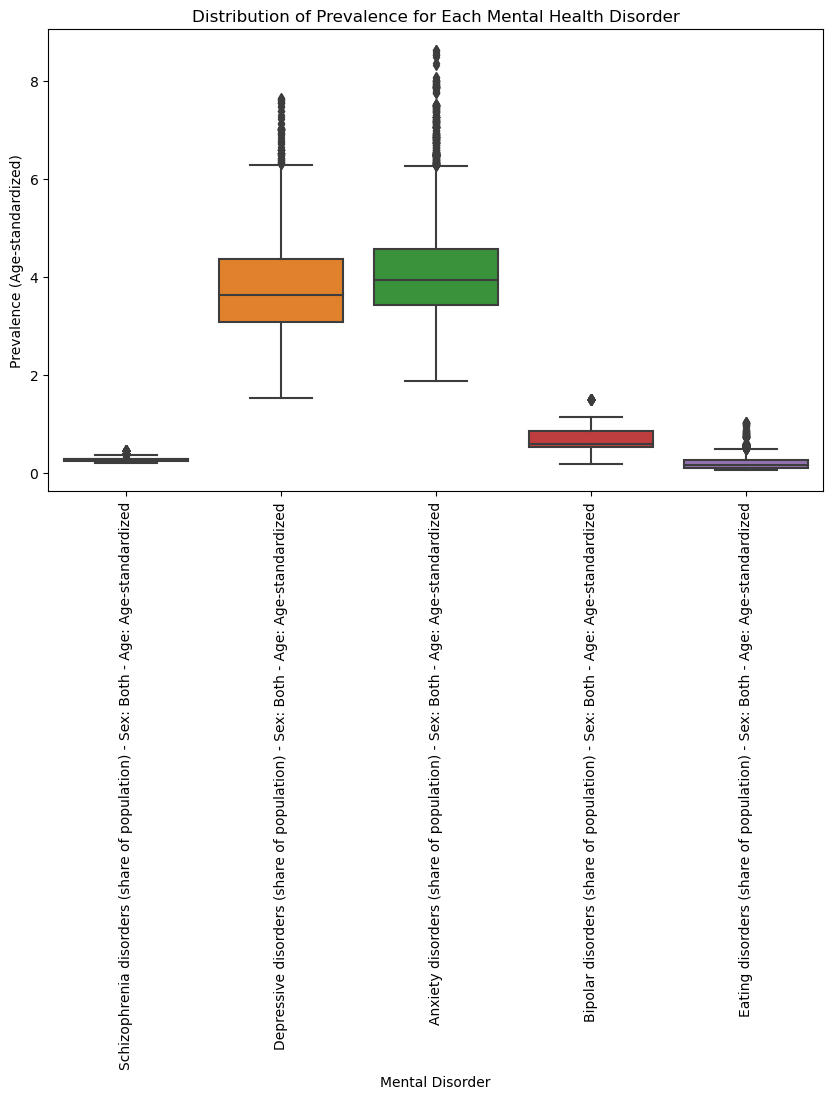

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted, x='Mental Disorder', y='Prevalence')
plt.title('Distribution of Prevalence for Each Mental Health Disorder')
plt.xlabel('Mental Disorder')
plt.ylabel('Prevalence (Age-standardized)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

/tmp/ipykernel_20/954220878.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


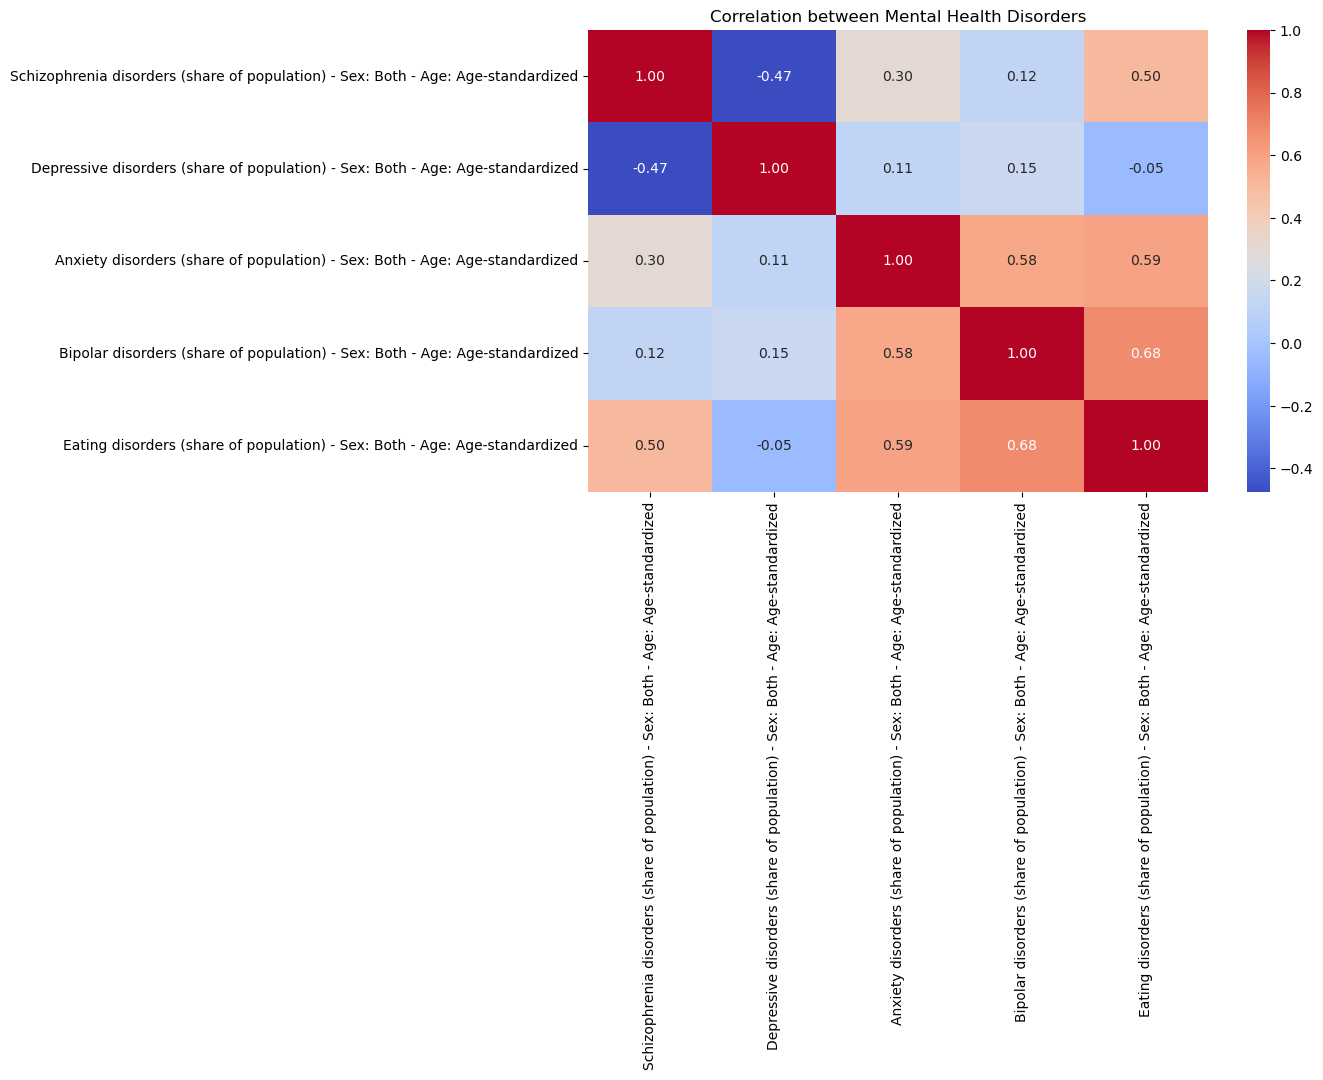

In [9]:
columns_for_correlation = ['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
                           'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
                           'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
                           'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
                           'Eating disorders (share of population) - Sex: Both - Age: Age-standardized']

correlation_matrix = df[columns_for_correlation].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Mental Health Disorders')
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


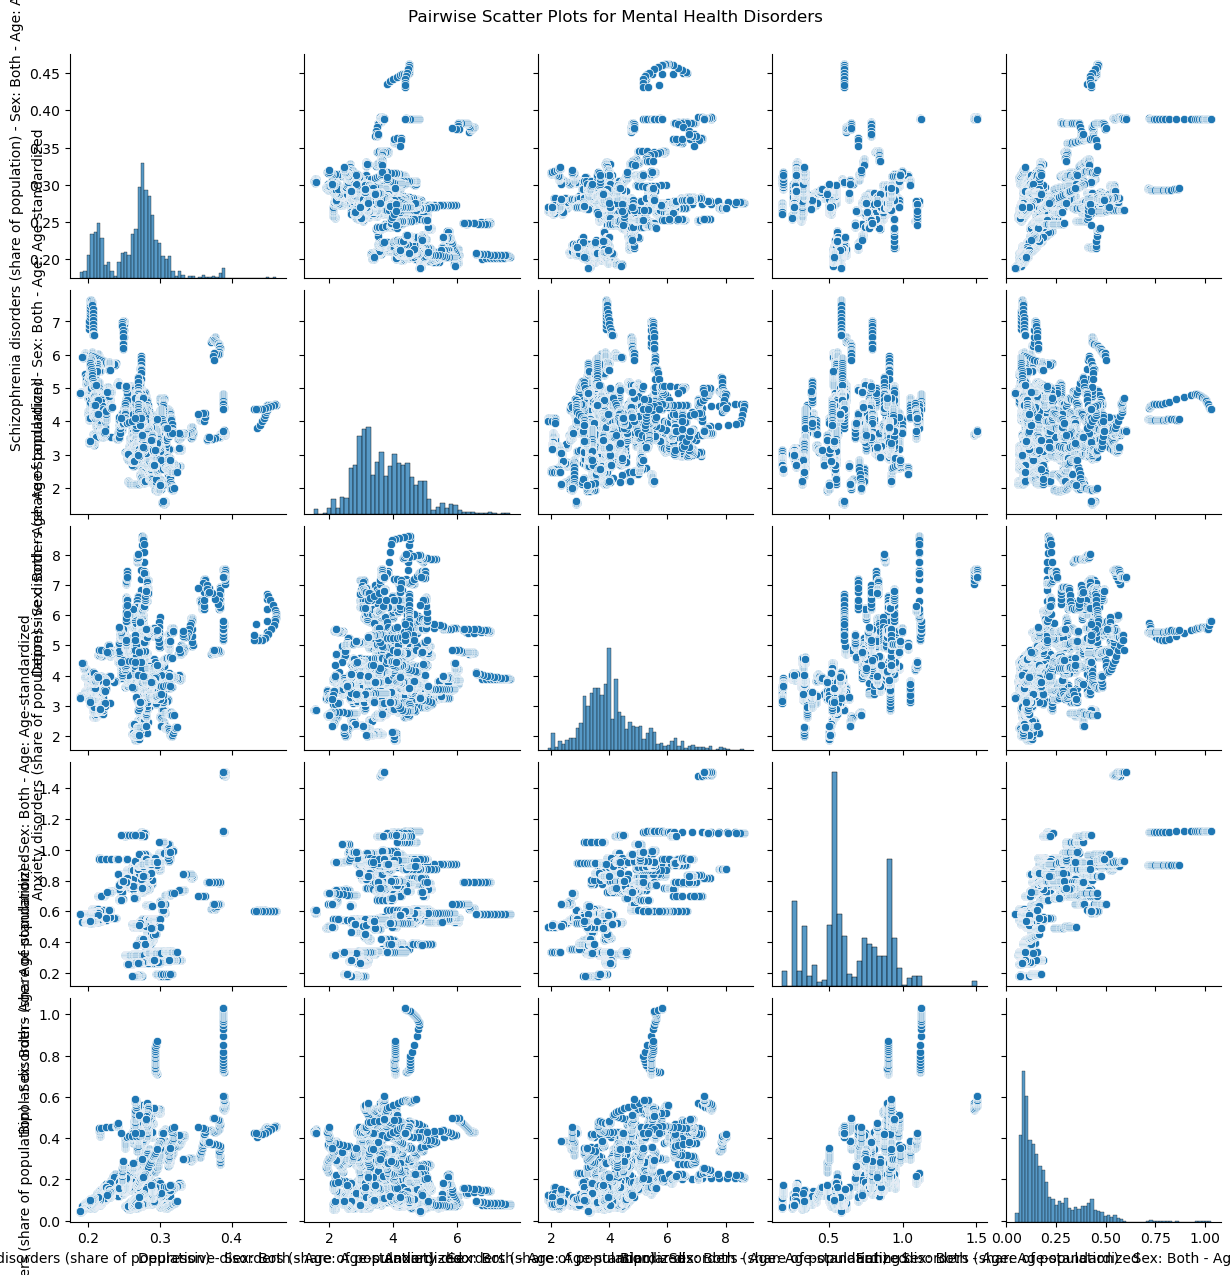

In [10]:
sns.pairplot(data=df, vars=['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
                           'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
                           'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
                           'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
                           'Eating disorders (share of population) - Sex: Both - Age: Age-standardized'])
plt.suptitle('Pairwise Scatter Plots for Mental Health Disorders', y=1.02)
plt.show()

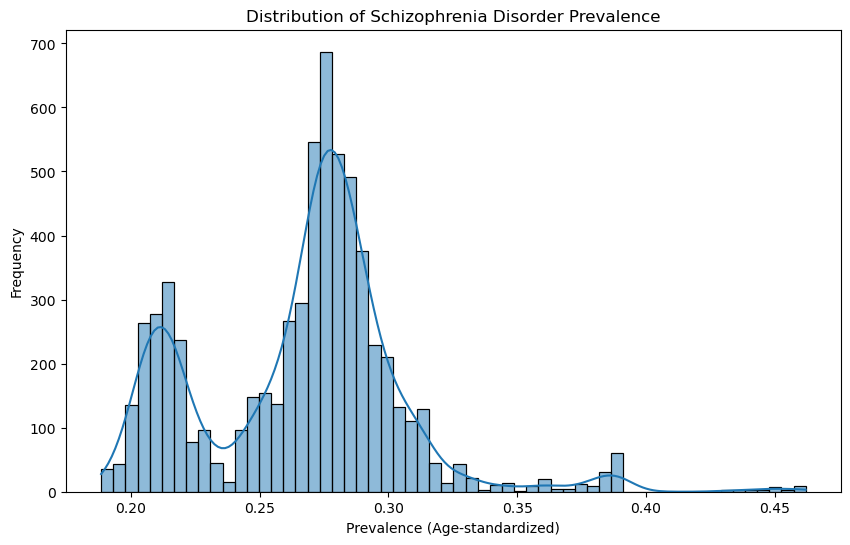

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized'], kde=True)
plt.title('Distribution of Schizophrenia Disorder Prevalence')
plt.xlabel('Prevalence (Age-standardized)')
plt.ylabel('Frequency')
plt.show()

/tmp/ipykernel_20/1757077746.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


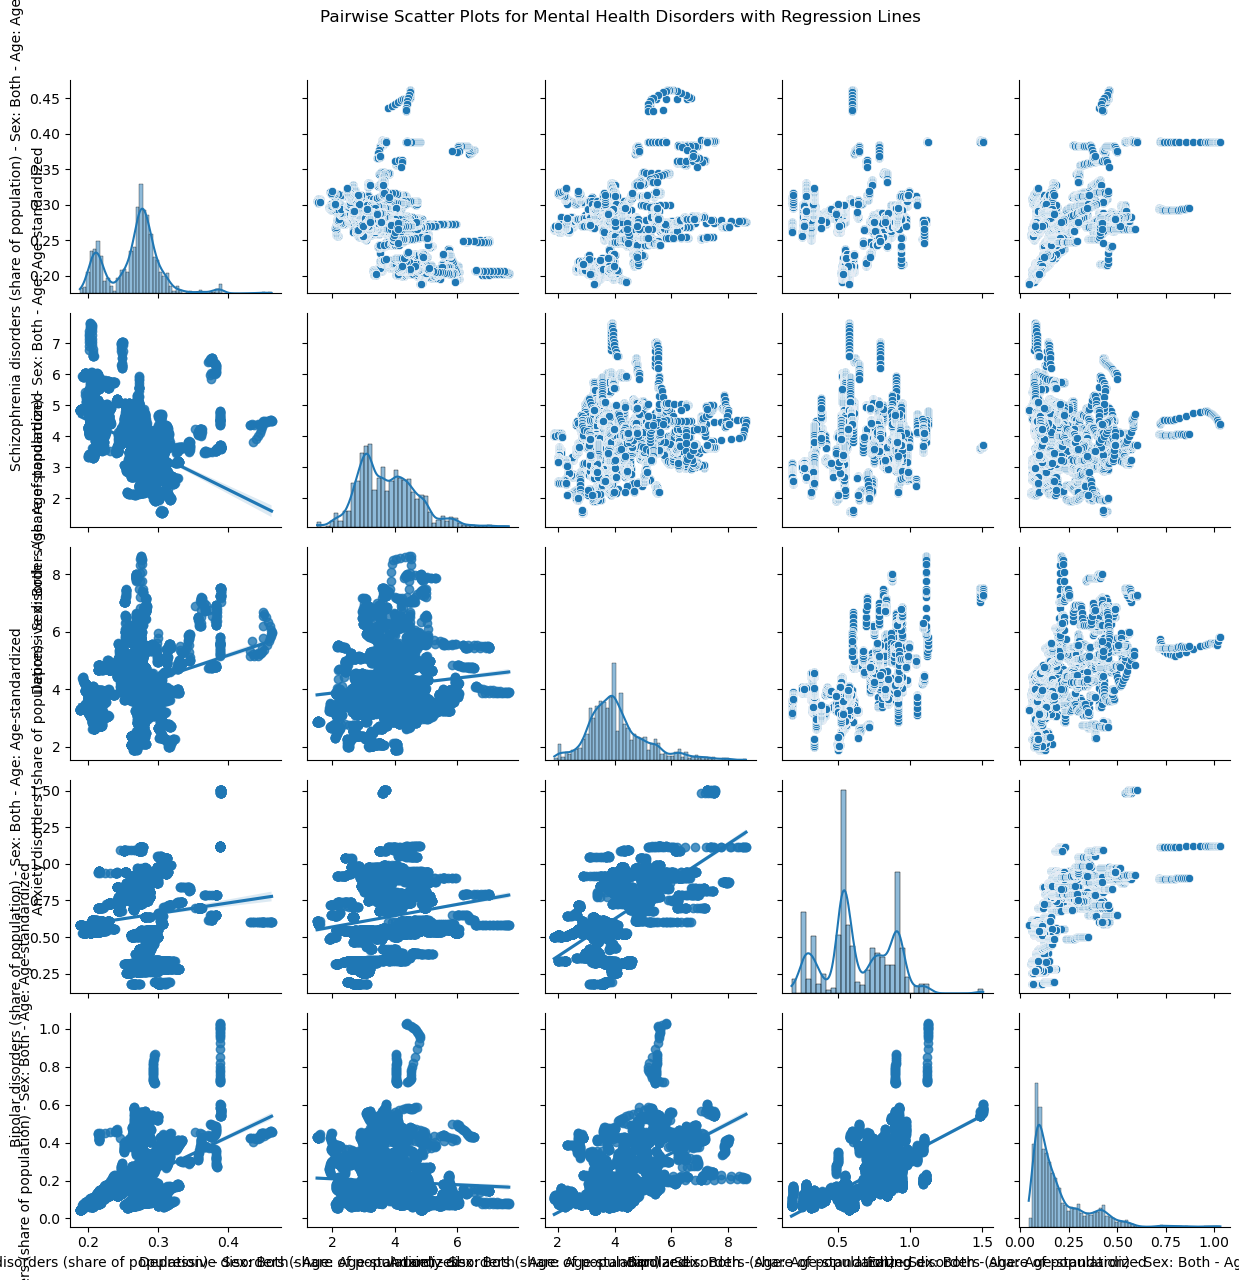

In [12]:
pair_grid = sns.PairGrid(df, vars=columns_for_correlation)
pair_grid.map_upper(sns.scatterplot)
pair_grid.map_lower(sns.regplot)
pair_grid.map_diag(sns.histplot, kde=True)
plt.suptitle('Pairwise Scatter Plots for Mental Health Disorders with Regression Lines', y=1.02)
plt.tight_layout()
plt.show()

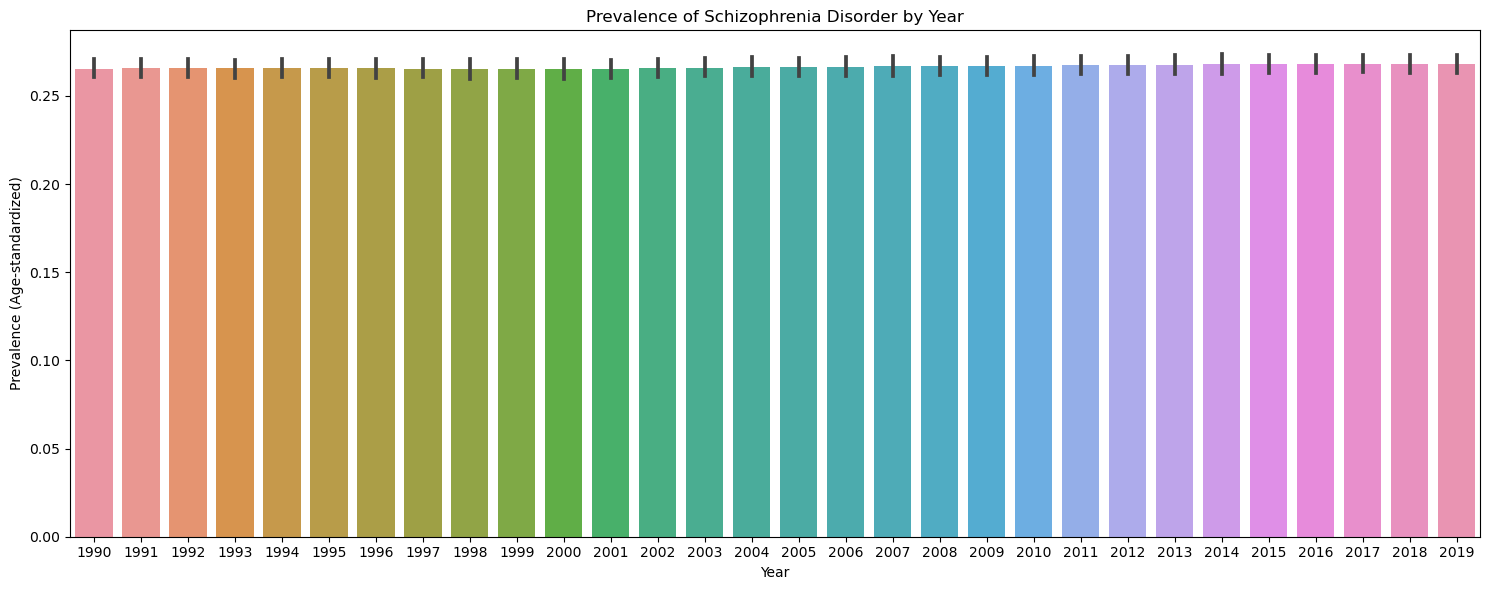

In [13]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='Year', y='Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized')
plt.title('Prevalence of Schizophrenia Disorder by Year')
plt.xlabel('Year')
plt.ylabel('Prevalence (Age-standardized)')
plt.tight_layout()
plt.show()

## Prediction of Schizophrenia Disorder Prevalence

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [15]:
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop(columns=['Year', 'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized'])
y = df_encoded['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 6.5544354143111315e-06


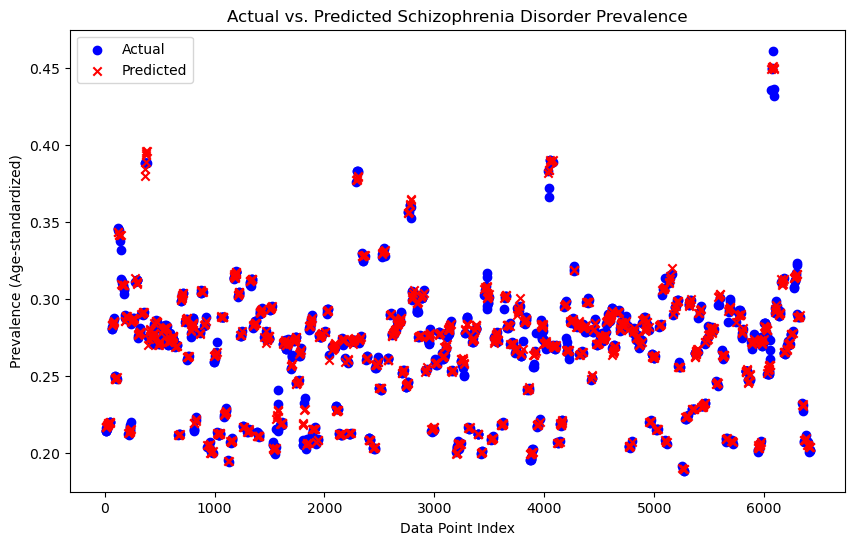

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, y_test, label='Actual', marker='o', color='blue')
plt.scatter(y_test.index, y_pred, label='Predicted', marker='x', color='red')
plt.title('Actual vs. Predicted Schizophrenia Disorder Prevalence')
plt.xlabel('Data Point Index')
plt.ylabel('Prevalence (Age-standardized)')
plt.legend()
plt.show()

Decision Tree MSE: 1.2281118844233639e-06


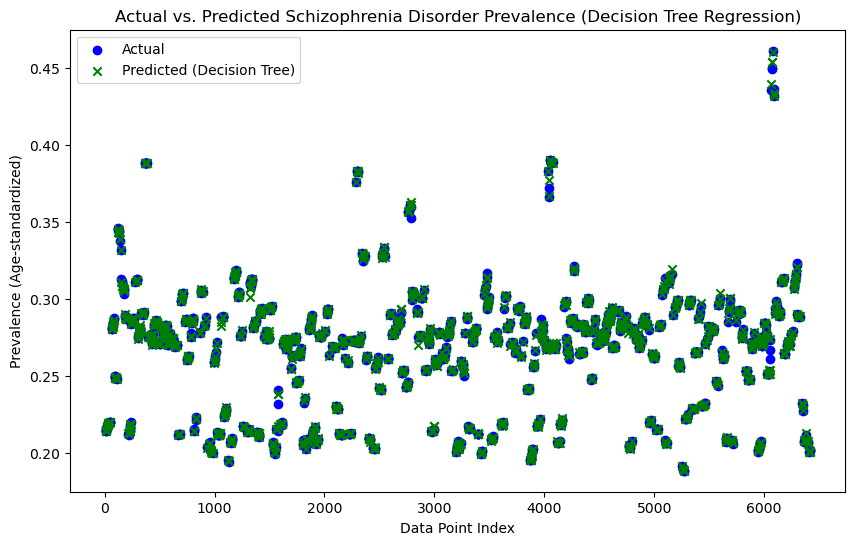

In [17]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

y_dt_pred = dt_model.predict(X_test)

dt_mse = mean_squared_error(y_test, y_dt_pred)
print(f"Decision Tree MSE: {dt_mse}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, y_test, label='Actual', marker='o', color='blue')
plt.scatter(y_test.index, y_dt_pred, label='Predicted (Decision Tree)', marker='x', color='green')
plt.title('Actual vs. Predicted Schizophrenia Disorder Prevalence (Decision Tree Regression)')
plt.xlabel('Data Point Index')
plt.ylabel('Prevalence (Age-standardized)')
plt.legend()
plt.show()

Random Forest MSE: 9.917991300503445e-07


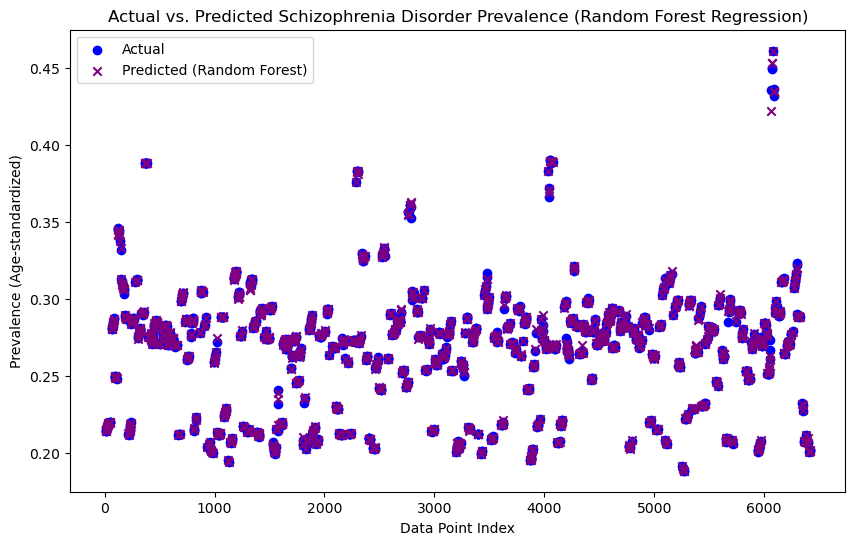

In [18]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_rf_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, y_rf_pred)
print(f"Random Forest MSE: {rf_mse}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, y_test, label='Actual', marker='o', color='blue')
plt.scatter(y_test.index, y_rf_pred, label='Predicted (Random Forest)', marker='x', color='purple')
plt.title('Actual vs. Predicted Schizophrenia Disorder Prevalence (Random Forest Regression)')
plt.xlabel('Data Point Index')
plt.ylabel('Prevalence (Age-standardized)')
plt.legend()
plt.show()